# **Group - 21**

1) Raghav Bhalla (2019379)

2) Ritesh Panwar (2019384) 

# **Count-Histogram Vector Baseline Model**

For similar landmark image retrieval

In [1]:
#Mounting Google Drive to Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML
import random
from PIL import Image
from collections import Counter
from urllib.parse import urlparse
from sklearn.neighbors import NearestNeighbors as KNN
from sklearn.neighbors import BallTree as KNN_BallTree
from sklearn.decomposition import PCA
import cv2
import pickle

Importing Images File Array

In [4]:
images_file_path = '/content/drive/My Drive/data/images_array'
with open(images_file_path, 'rb') as f:
    images_Arr = pickle.load(f)

In [3]:
images_file_path = '/content/drive/My Drive/data/kmeans_images_array'
with open(images_file_path, 'rb') as f:
    filter_images_Arr = pickle.load(f)

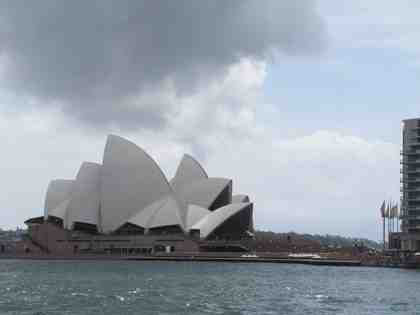

In [5]:
images_Arr[1000]

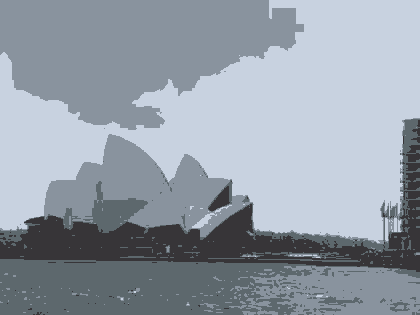

In [6]:
filter_images_Arr[1000]

**TRAIN-TEST Split**

In [7]:
images_train = images_Arr[:7500]
images_test = images_Arr[7500:]

In [8]:
filter_images_train = filter_images_Arr[:7500]
filter_images_test = filter_images_Arr[7500:]

Extracting Count-Histogram vectors for each Image as its features. A feature vector in this method is of length 256 where each index is pixel value, and the value stored at that index in the number of occurences of associated pixel in the image.

In [9]:
def extract_features(image):
  #extracting image as an array and flattening it to reshape
  img_arr = np.asarray(image)
  img_arr = img_arr.flatten()

  #Generating the count-histogram vector of an image to get key-value pairs, where key is the pixel value from [0,255] and its value is the number of occurences of the pixel in the image.
  count_hist_vector = Counter(img_arr)
  count_hist_feature = np.array([])

  #Normalizing vector to make sure length is 256 everytime
  for i in range(256):
      if i in count_hist_vector.keys():
          count_hist_feature = np.append(count_hist_feature, count_hist_vector[i])
      else:
          count_hist_feature = np.append(count_hist_feature, 0)

  return count_hist_feature


**Only run if feature file is not extracted**

In [ ]:
features = []

array_for_features = filter_images_train

for index in range(len(array_for_features)):

  #extarcting image features
  count_hist_feature = extract_features(array_for_features[index])
  
  features.append(count_hist_feature)
  print("Image -", index, 'Done')

features = np.array(features)

#Saving extracted count-histogram features as a database for similarity comparison
feature_path = "features_baseline_gaussian.npy"
np.save(feature_path, features)

feature_path = "/content/drive/My Drive/data/features_baseline_kmeans.npy"
np.save(feature_path, features)

Streaming output truncated to the last 5000 lines.
Image - 2500 Done
Image - 2501 Done
Image - 2502 Done
Image - 2503 Done
Image - 2504 Done
Image - 2505 Done
Image - 2506 Done
Image - 2507 Done
Image - 2508 Done
Image - 2509 Done
Image - 2510 Done
Image - 2511 Done
Image - 2512 Done
Image - 2513 Done
Image - 2514 Done
Image - 2515 Done
Image - 2516 Done
Image - 2517 Done
Image - 2518 Done
Image - 2519 Done
Image - 2520 Done
Image - 2521 Done
Image - 2522 Done
Image - 2523 Done
Image - 2524 Done
Image - 2525 Done
Image - 2526 Done
Image - 2527 Done
Image - 2528 Done
Image - 2529 Done
Image - 2530 Done
Image - 2531 Done
Image - 2532 Done
Image - 2533 Done
Image - 2534 Done
Image - 2535 Done
Image - 2536 Done
Image - 2537 Done
Image - 2538 Done
Image - 2539 Done
Image - 2540 Done
Image - 2541 Done
Image - 2542 Done
Image - 2543 Done
Image - 2544 Done
Image - 2545 Done
Image - 2546 Done
Image - 2547 Done
Image - 2548 Done
Image - 2549 Done
Image - 2550 Done
Image - 2551 Done
Image - 2552 

Evaluation Metric Calculation functions (Euclidean Distance and Cosine Similarity)

In [10]:
#Euclidean distance between features of each image in database with the query image
def euclidian_dist(features, query_feature):
  euclidean_dists = np.linalg.norm(features - query_feature, axis=1)
  return euclidean_dists

#Cosine Similarity between features of each image in database with the query image
def cosine_similarity(features, query_feature):
  cosine_similarity_scores = features.dot(query_feature) / (np.linalg.norm(features, axis=1) * np.linalg.norm(query_feature))
  return cosine_similarity_scores

Function to plot similar images along with their respective distance from the query image passed in an array/list

In [11]:
def plot_images(num_images, similar_images):

  #Displaying Similar Images with the distance metric
  axes=[]
  figure = plt.figure(figsize=(18,14), edgecolor='black')

  for i in range(num_images):
      axes.append(figure.add_subplot(4, 5, i+1))
      rank = 'Rank-' + str(i+1)
      axes[-1].set_title(rank + '\nScore: '+ str(similar_images[i][0]))  
      plt.imshow(similar_images[i][1])
      plt.axis('off')
  
  figure.tight_layout()
  plt.show()

Defining a function to predict similar images based on similarity using Nearest Neighbour algorithm

In [16]:
def KNN_similar_images(index, num_images, metric):

  #Displaying query Image first
  print('Query Image Without Filter')
  display(images_test[index])
  print('--------------------------------\n')

  print("Query Image with filter :")
  query_img = filter_images_test[index]
  display(query_img)


  #Loading features database
  features_file_path = "/content/drive/My Drive/data/features_baseline.npy"
  # features_file_path = 'features_baseline.npy'
  features = np.load(features_file_path)

  #extracting features of query file from features database
  query_feature = extract_features(images_test[index])
  query_feature = np.array(query_feature).reshape(1,-1)

  #Using (Nearest Neighbour Technique)
  tree = KNN_BallTree(features, leaf_size=1000, metric=metric)              
  distances, indices = tree.query(query_feature, k=num_images)   


  similar_images = []
  for i in range(len(indices[0])):
    similar_images.append((round(distances[0][i]/100000,5), images_Arr[indices[0][i]]))

  #Displaying Similar Images with the distance metric
  print('Similar Images')
  plot_images(num_images, similar_images)

Interactive code to precit similar landmark images

**Note: Max Number of Similar Images input can be 20**

Enter Input Index: 200
Enter Number of Similar Images to be predicted (Upto 20): 5


------------------------------------------------------------------------
	 SIMILAR IMAGES BASED ON MANHATTAN DISTANCE
------------------------------------------------------------------------
Query Image Without Filter


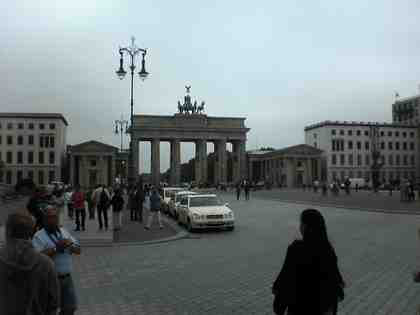

--------------------------------

Query Image with filter :


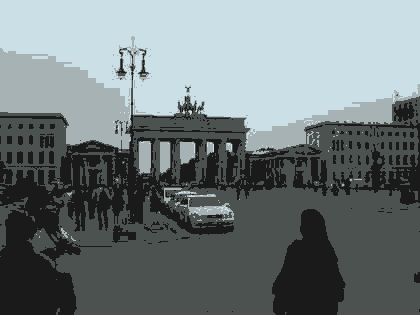

Similar Images


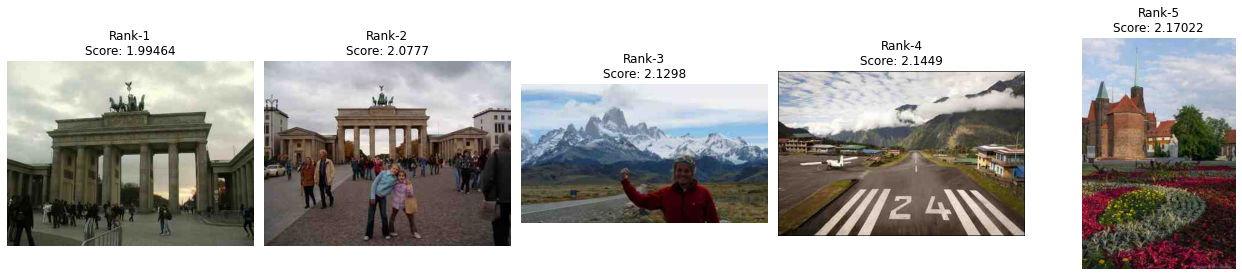



------------------------------------------------------------------------
	 SIMILAR IMAGES BASED ON EUCLIDEAN DISTANCE
------------------------------------------------------------------------
Query Image Without Filter


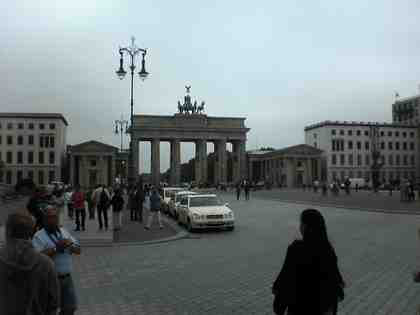

--------------------------------

Query Image with filter :


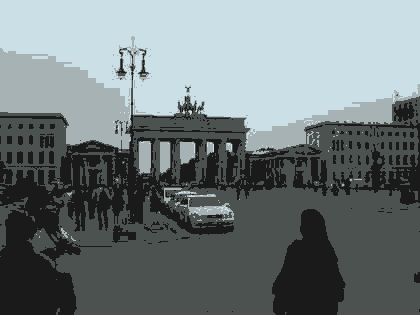

Similar Images


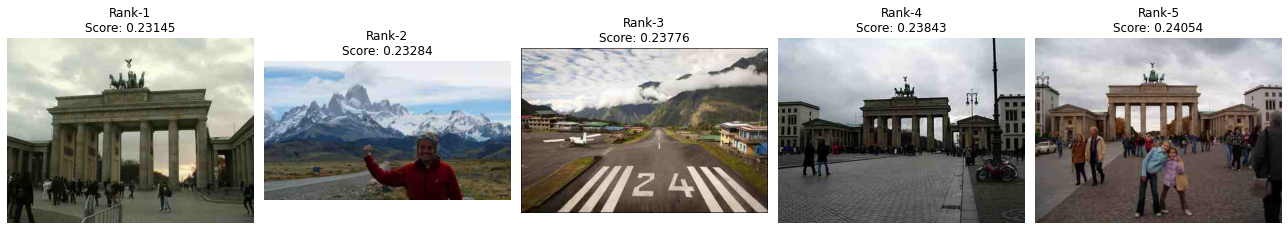

In [17]:
index = int(input("Enter Input Index: "))
num_images = int(input("Enter Number of Similar Images to be predicted (Upto 20): "))

print('\n')
print('------------------------------------------------------------------------')
print('\033[1m' + '\t SIMILAR IMAGES BASED ON MANHATTAN DISTANCE' + '\033[0m')
print('------------------------------------------------------------------------')
KNN_similar_images(index, num_images, 'manhattan')

print('\n')
print('------------------------------------------------------------------------')
print('\033[1m' + '\t SIMILAR IMAGES BASED ON EUCLIDEAN DISTANCE' + '\033[0m')
print('------------------------------------------------------------------------')
KNN_similar_images(index, num_images, 'euclidean')